In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
df = pd.DataFrame({"year":[2021]*5, 
                   "month":[i for i in range(1, 6)], 
                   "day":[1] * 5})

# datetime 
df["date_dt"] = pd.to_datetime(df)
df["date_str"] = df["date_dt"].apply(lambda x: x.strftime("%Y-%m-%d"))

# random
df["dy"] = np.random.random(size=5)
df["y"] = df["dy"].cumsum()

In [3]:
df

,year,month,day,date_dt,date_str,dy,y
0,2021,1,1,2021-01-01,2021-01-01,0.369303,0.369303
1,2021,2,1,2021-02-01,2021-02-01,0.854197,1.223500
2,2021,3,1,2021-03-01,2021-03-01,0.693252,1.916752
3,2021,4,1,2021-04-01,2021-04-01,0.965964,2.882716
4,2021,5,1,2021-05-01,2021-05-01,0.949805,3.832521


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      5 non-null      int64         
 1   month     5 non-null      int64         
 2   day       5 non-null      int64         
 3   date_dt   5 non-null      datetime64[ns]
 4   date_str  5 non-null      object        
 5   dy        5 non-null      float64       
 6   y         5 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 408.0+ bytes


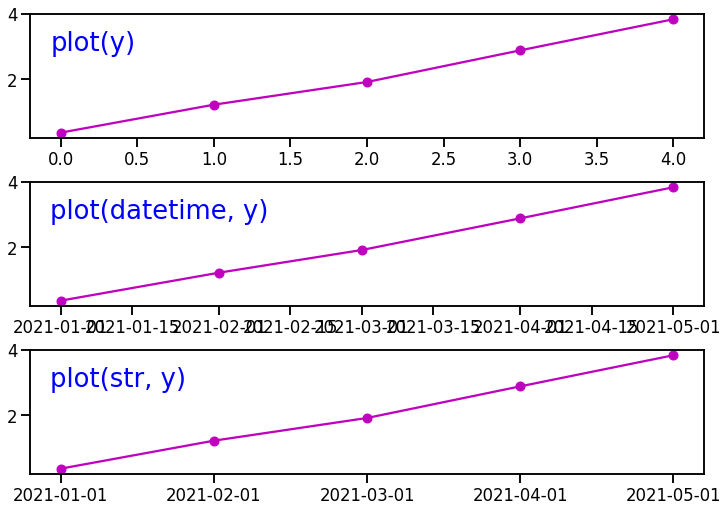

In [5]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 7), constrained_layout=True)

axs[0].plot(df["y"], "mo-")                   # y data만 plot
axs[1].plot(df["date_dt"], df["y"], "mo-")    # x data : datetime
axs[2].plot(df["date_str"], df["y"], "mo-")   # x data : string

for ax, text in zip(axs, ["plot(y)", "plot(datetime, y)", "plot(str, y)"]):
    ax.text(0.03, 0.7, text, fontsize="x-large", color="b", transform=ax.transAxes)
    
fig.savefig("datetime01.png")

In [6]:
for ax in axs:
    print(ax.get_xticks())

[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
[18628. 18642. 18659. 18673. 18687. 18701. 18718. 18732. 18748.]
[0, 1, 2, 3, 4]


In [7]:
from pprint import pprint

for ax in axs:
    pprint(ax.get_xticklabels())

[Text(-0.5, 0, '−0.5'),
 Text(0.0, 0, '0.0'),
 Text(0.5, 0, '0.5'),
 Text(1.0, 0, '1.0'),
 Text(1.5, 0, '1.5'),
 Text(2.0, 0, '2.0'),
 Text(2.5, 0, '2.5'),
 Text(3.0, 0, '3.0'),
 Text(3.5, 0, '3.5'),
 Text(4.0, 0, '4.0'),
 Text(4.5, 0, '4.5')]
[Text(18628.0, 0, '2021-01-01'),
 Text(18642.0, 0, '2021-01-15'),
 Text(18659.0, 0, '2021-02-01'),
 Text(18673.0, 0, '2021-02-15'),
 Text(18687.0, 0, '2021-03-01'),
 Text(18701.0, 0, '2021-03-15'),
 Text(18718.0, 0, '2021-04-01'),
 Text(18732.0, 0, '2021-04-15'),
 Text(18748.0, 0, '2021-05-01')]
[Text(0, 0, '2021-01-01'),
 Text(1, 0, '2021-02-01'),
 Text(2, 0, '2021-03-01'),
 Text(3, 0, '2021-04-01'),
 Text(4, 0, '2021-05-01')]


In [8]:
df_drop = df.drop(3)
df_drop

,year,month,day,date_dt,date_str,dy,y
0,2021,1,1,2021-01-01,2021-01-01,0.369303,0.369303
1,2021,2,1,2021-02-01,2021-02-01,0.854197,1.223500
2,2021,3,1,2021-03-01,2021-03-01,0.693252,1.916752
4,2021,5,1,2021-05-01,2021-05-01,0.949805,3.832521


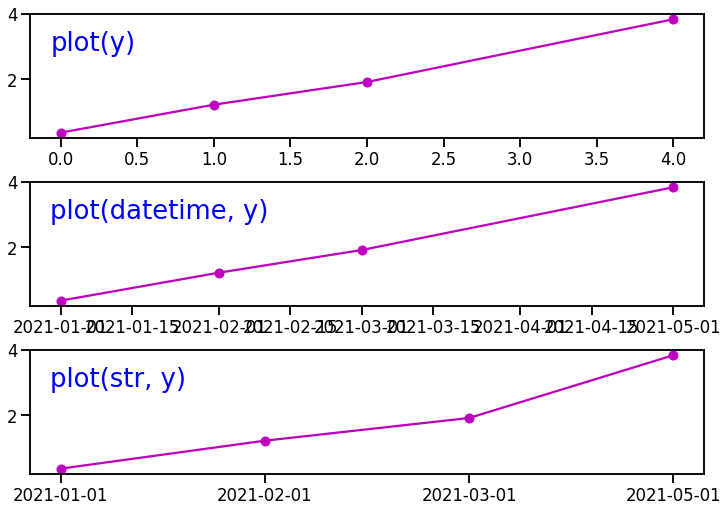

In [9]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 7), constrained_layout=True)

axs[0].plot(df_drop["y"], "mo-")                        # y data만 plot
axs[1].plot(df_drop["date_dt"], df_drop["y"], "mo-")    # x data : datetime
axs[2].plot(df_drop["date_str"], df_drop["y"], "mo-")   # x data : string

for ax, text in zip(axs, ["plot(y)", "plot(datetime, y)", "plot(str, y)"]):
    ax.text(0.03, 0.7, text, fontsize="x-large", color="b", transform=ax.transAxes)
    
fig.savefig("datetime06.png")

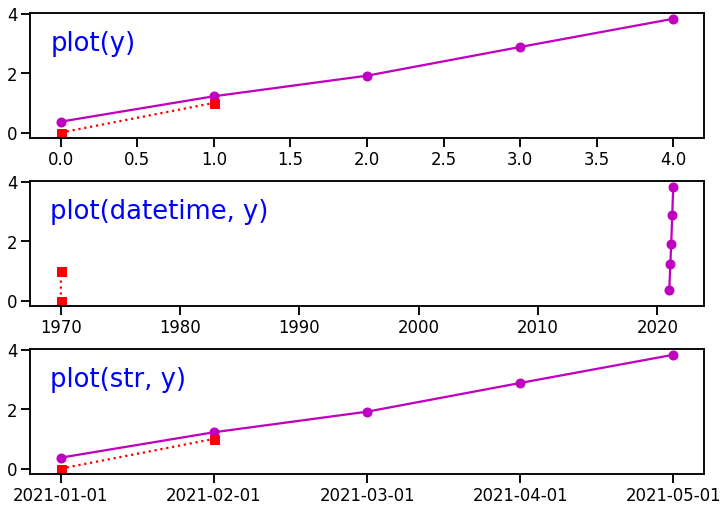

In [10]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 7), constrained_layout=True)

axs[0].plot(df["y"], "mo-")                   # y data만 plot
axs[1].plot(df["date_dt"], df["y"], "mo-")    # x data : datetime
axs[2].plot(df["date_str"], df["y"], "mo-")   # x data : string

for ax, text in zip(axs, ["plot(y)", "plot(datetime, y)", "plot(str, y)"]):
    ax.plot([0, 1], [0, 1], "rs:")            # (0,0)~(1,1) 사이 직선
    ax.text(0.03, 0.7, text,                  # text
            fontsize="x-large", color="b", transform=ax.transAxes)

fig.savefig("datetime02.png")

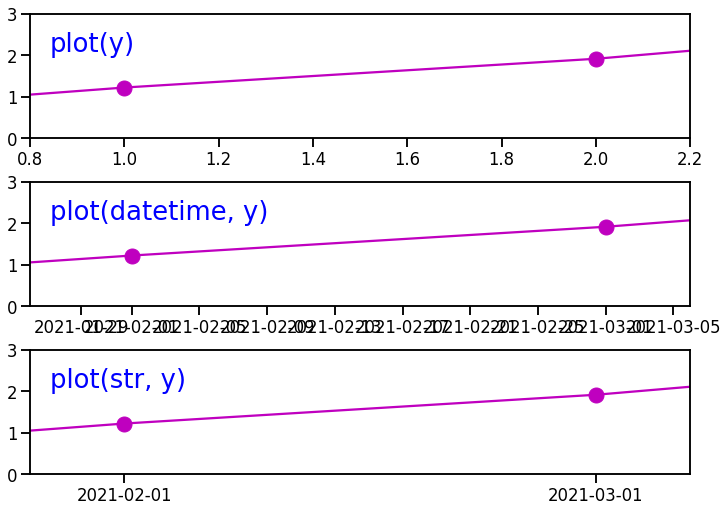

In [14]:
import datetime

fig, axs = plt.subplots(nrows=3, figsize=(10, 7), constrained_layout=True)

axs[0].plot(df["y"], "mo-", ms=15)                   # y data만 plot
axs[0].set_xlim(0.8, 2.2)                            # x 범위: index 기준

axs[1].plot(df["date_dt"], df["y"], "mo-", ms=15)    # x data : datetime
axs[1].set_xlim(datetime.date(2021,1,26),            # x 범위: datetime 기준
                datetime.date(2021,3,6))

axs[2].plot(df["date_str"], df["y"], "mo-", ms=15)   # x data : string
axs[2].set_xlim(0.8, 2.2)                            # x 범위: index 기준

for ax, text in zip(axs, ["plot(y)", "plot(datetime, y)", "plot(str, y)"]):
    ax.set_ylim(0, 3)
    ax.text(0.03, 0.7, text, 
            fontsize="x-large", color="b", transform=ax.transAxes)
    
fig.savefig("datetime03.png")

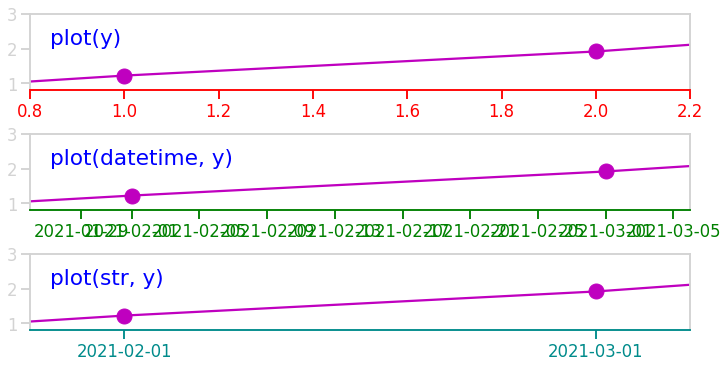

In [17]:
import datetime

fig, axs = plt.subplots(nrows=3, figsize=(10, 5), constrained_layout=True)

axs[0].plot(df["y"], "mo-", ms=15)                   # y data만 plot
axs[0].set_xlim(0.8, 2.2)                            # x 범위: index 기준

axs[1].plot(df["date_dt"], df["y"], "mo-", ms=15)    # x data : datetime
axs[1].set_xlim(datetime.date(2021,1,26),            # x 범위: datetime 기준
                datetime.date(2021,3,6))

axs[2].plot(df["date_str"], df["y"], "mo-", ms=15)   # x data : string
axs[2].set_xlim(0.8, 2.2)                            # x 범위: index 기준

for ax, text, c in zip(axs, ["plot(y)", "plot(datetime, y)", "plot(str, y)"], ["r", "g", "darkcyan"]):
    ax.set_ylim(0.8, 3)
    ax.text(0.03, 0.6, text, 
            fontsize="large", color="b", transform=ax.transAxes)
    ax.tick_params(axis="x", labelcolor=c, color=c)
    ax.spines["bottom"].set_color(c)
    ax.spines[["top", "left", "right"]].set_color("lightgray")
    ax.tick_params(axis="y", labelcolor="lightgray", color="lightgray")
    
fig.set_facecolor("w")
fig.savefig("77_datetime00.png")